# Chronos T5 


### Data For Chronos T5


In [13]:
import pandas as pd 
token = 'data/BTC-USD.csv'
data = pd.read_csv(token, parse_dates=['Date'], index_col=['Date'])
data.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
data


,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-22,83832.484375
2025-03-23,86054.375000
2025-03-24,87498.914062


In [20]:
# Define the prediction length
prediction_length = 7

# Split the data
close_train = data['Close'][:-prediction_length]
close_test = data['Close'][-prediction_length:]
close_test


Date
2025-03-20    84167.195312
2025-03-21    84043.242188
2025-03-22    83832.484375
2025-03-23    86054.375000
2025-03-24    87498.914062
2025-03-25    87471.703125
2025-03-26    86587.390625
Name: Close, dtype: float64

### Train Chronos T5 


In [22]:
# Chronos Pipeline using the T5 model for forecasting coming from the Hugging Face library
import torch
from chronos import ChronosPipeline

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

pipeline = ChronosPipeline.from_pretrained(
    'amazon/chronos-t5-large',
    device_map = device,
    torch_dtype = torch.float32
)

context = torch.tensor(close_train, dtype=torch.float32)


forecast = pipeline.predict(context, prediction_length, num_samples=100)

cuda


c:\Users\Ivo\miniconda3\envs\backtest_env\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ivo\.cache\huggingface\hub\models--amazon--chronos-t5-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\Ivo\AppData\Local\Temp\ipykernel_3380\2326012744.py:12: FutureWarning: Series.__getitem__ treati

In [23]:
import numpy as np
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
median

array([86644.6796875, 86399.90625  , 86644.6796875, 86155.1328125,
       86399.90625  , 86644.6796875, 86644.6796875])

#### Plots 

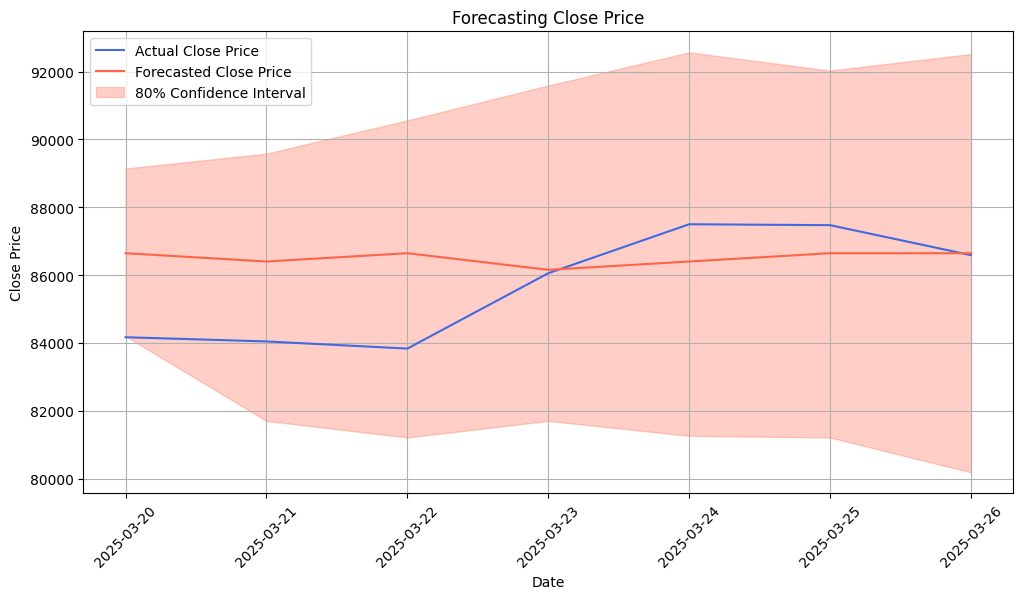

In [24]:
import matplotlib.pyplot as plt

# Plot the forecast with the actual data and the prediction interval
plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Actual Close Price', color='royalblue')
plt.plot(close_test.index, median, label='Forecasted Close Price', color='tomato')
plt.fill_between(close_test.index, low, high, color='tomato', alpha=0.3, label='80% Confidence Interval')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasting Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Chronos-bolt-base

In [25]:
import torch
from chronos import BaseChronosPipeline
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
pipeline = BaseChronosPipeline.from_pretrained(
    'amazon/chronos-bolt-base',
    device_map = device,
    torch_dtype = torch.float32
)

context = torch.tensor(close_train, dtype=torch.float32)


forecast = pipeline.predict(context, prediction_length)

cuda


C:\Users\Ivo\AppData\Local\Temp\ipykernel_3380\2797387708.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(close_train, dtype=torch.float32)
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


In [26]:
import numpy as np
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
median

array([87967.8359375, 88069.765625 , 87829.609375 , 87851.96875  ,
       87727.8125   , 87706.3203125, 87843.046875 ])

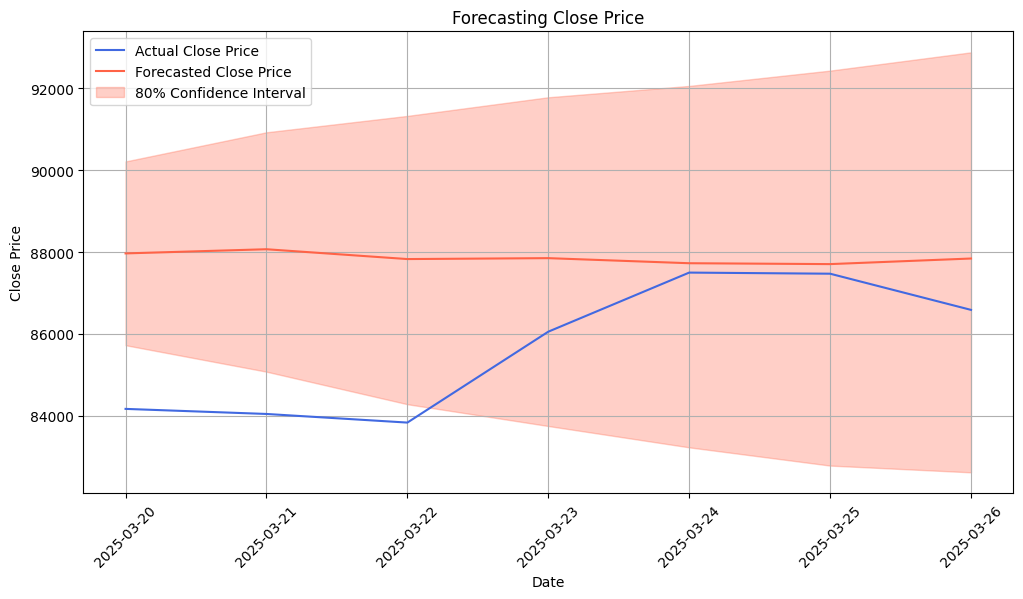

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Actual Close Price', color='royalblue')
plt.plot(close_test.index, median, label='Forecasted Close Price', color='tomato')
plt.fill_between(close_test.index, low, high, color='tomato', alpha=0.3, label='80% Confidence Interval')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasting Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()